## <B>A/B Testing for the most effective marketing strategy

**Problem:**

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks
<br>
<br>
<br>
**The description of the data set:**<br>
Our data set consists of 548 entries including:
- MarketId: an inhouse tag used to describe market types, we won't be using it
- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.
- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- Sales in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- Market size: there are three types of market size: small, medium and large.
- Week: One of four weeks when the promotions were run (1–4).

**Method and evalutaion:**
- A/B testing to compare 2 promotional strategies at a time to decide the best among the three.
- One sided t-test will be used for all the comparisions.

 
 <br>

<b>Importing the data and libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('MarketingCampaign.csv')
print(data.shape)
data.head()

(548, 7)


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


 
 <br>

<b>Basic data exploration:

In [3]:
## Number of uniques in all

data.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [4]:
## Checking null values
data.isna().any()

MarketID            False
MarketSize          False
LocationID          False
AgeOfStore          False
Promotion           False
week                False
SalesInThousands    False
dtype: bool

In [5]:
## Checking the distributions of variables:

data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000



<b>

<b> Exploratory Data Analysis:

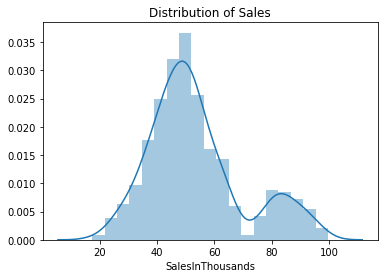

In [6]:
## Distribution of the Sales

ax= sns.distplot( data.SalesInThousands )
ax.set_title('Distribution of Sales')
plt.show()

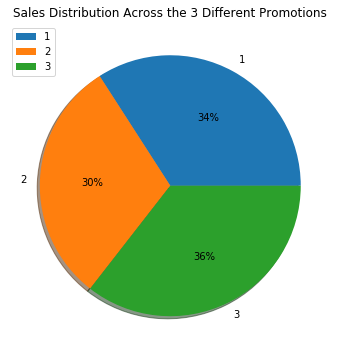

In [7]:
## Sales according to Promotion type

ax = data.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(6,6), autopct='%1.0f%%',\
                                                                  shadow=True)
ax.set_ylabel('')
ax.legend()
ax.set_title('Sales Distribution Across the 3 Different Promotions')
plt.show()

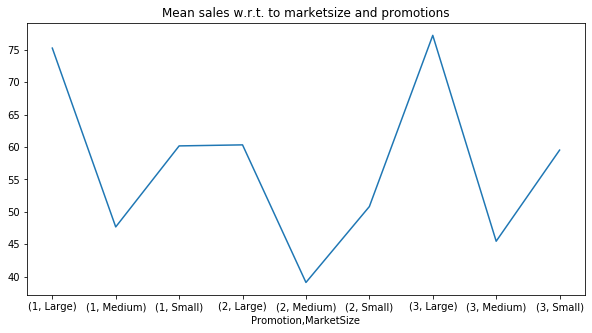

In [8]:
## Mean sales grouped by Promotion type and market size

ax = data.groupby(['Promotion', 'MarketSize']).mean()['SalesInThousands'].plot(figsize=(10,5))
ax.set_title('Mean sales w.r.t. to marketsize and promotions')
plt.show()

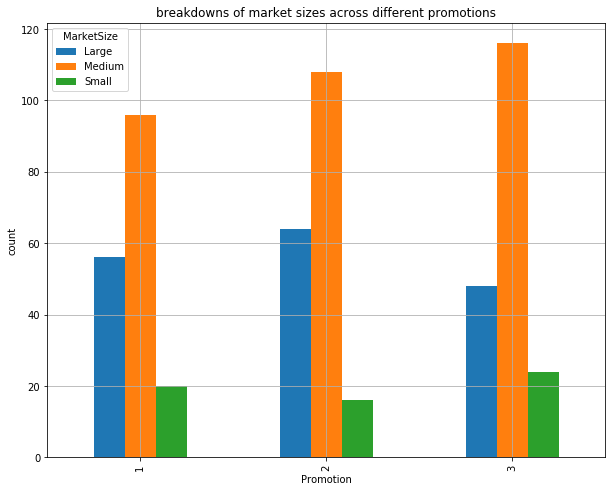

In [9]:
# Put this into a plot

ax = data.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(kind='bar',\
                                                                                              figsize=(10,8),\
                                                                                              grid=True)
ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

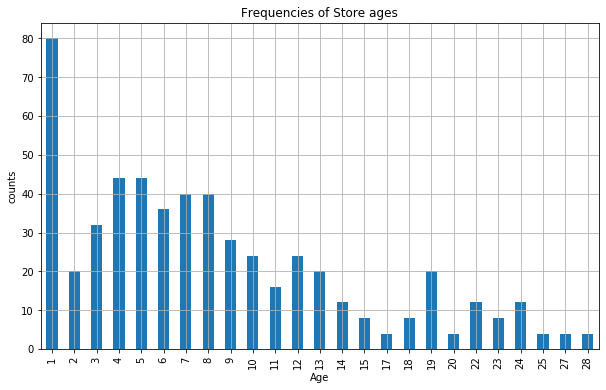

In [10]:
## Checking the distribution of the store ages.

ax = data.groupby('AgeOfStore').count()['MarketID'].plot(figsize=(10,6), grid=True, kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('counts')
ax.set_title('Frequencies of Store ages')
plt.show()

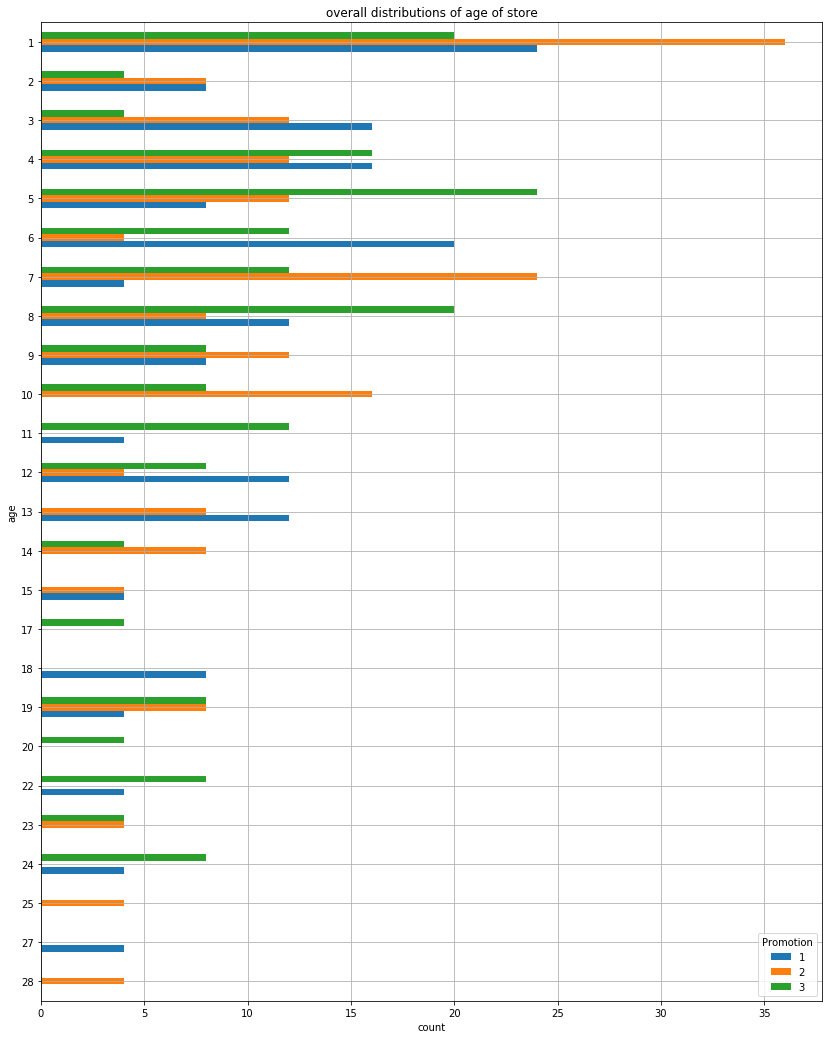

In [11]:
# Visaulize this summary
ax = data.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].\
plot(kind='barh', figsize=(14,18), grid=True)
ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')
plt.show()


<br>

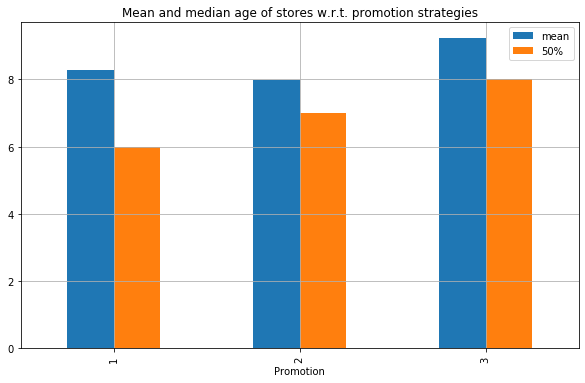

In [12]:
## Age of stores vs Promotion strategies:

ax = data.groupby('Promotion').describe()['AgeOfStore'][['mean', '50%']].plot(kind='bar', figsize=(10, 6), \
                                                                             grid=True)
ax.set_title('Mean and median age of stores w.r.t. promotion strategies')
plt.show()

It is important that the data is similar in all promotional strategies otherwise the results of A/B tests wont make sense if A has stores that are pretty old and B has comparitively very new stores. Luckily, data in our sample is consistent enough.

 
 <br>

### <b>A/B testing

In [13]:
alpha = 0.05
alpha

0.05

In [14]:
## Means of all the samples

means = data.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [15]:
## Variances of all the samples

var = data.groupby('Promotion').var()['SalesInThousands']
var

Promotion
1    274.027688
2    228.280515
3    281.106494
Name: SalesInThousands, dtype: float64

In [16]:
## Sample size of all the samples

numbers = data.groupby('Promotion').count()['SalesInThousands']
numbers

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

We can see that the sample sizes of all the 3 samples are also not very different from each other and that is a good sign.

In [17]:
## Separating samples

prom1 = data.loc[data.Promotion == 1, 'SalesInThousands']
prom2 = data.loc[data.Promotion == 2, 'SalesInThousands']
prom3 = data.loc[data.Promotion == 3, 'SalesInThousands']
prom1

8      44.54
9      37.94
10     45.49
11     34.75
24     42.92
       ...  
539    61.63
540    59.87
541    62.99
542    57.20
543    64.34
Name: SalesInThousands, Length: 172, dtype: float64

 
 <br>

### >>Comparing Promotion 1 vs Promotion 3 (A/B test)

In [18]:
H0 = 'There is no difference between sales with Promotion types 1 and 3.'
H1 = 'Sales from Promotion 1 is more than that of Promotion 3.'

In [19]:
t,p = stats.ttest_ind(prom1, prom3, equal_var=False)
t,p/2

(1.5560224307758634, 0.06029573871114739)

Since we are doing a one-sided test, we will divide the p-value by 2.

In [20]:
if p/2 < alpha:
    print(H1)
else:
    print(H0)

There is no difference between sales with Promotion types 1 and 3.



<br>

### >>Comparing Promotion 2 vs Promotion 3 (A/B test)

In [21]:
H0 = 'There is no difference between sales with Promotion types 2 and 3.'
H1 = 'Sales from Promotion 3 is more than that of Promotion 2.'

In [22]:
t,p = stats.ttest_ind(prom2, prom3, equal_var=False)
t,p/2

(-4.88139271089348, 7.846366588019946e-07)

Since we are doing a one-sided test, we will divide the p-value by 2.

In [23]:
if p/2 < alpha:
    print(H1)
else:
    print(H0)

Sales from Promotion 3 is more than that of Promotion 2.


### <b>Conclusion

**After running 2 A/B tests on samples of sales values between Promotion 1-3 and 2-3, we find that:<br>**
1) There is not a significant difference between sales coming from Promotion 1 and 3.<br>
2) Sales coming from Promotion 3 is significantly more than that coming from Promotion 2.<br>
3) Sales strategies 1 and 3 both are better than 2, but between 1 and 3, there's not much difference in terms of average sales.

#### Hence, we can conclude that Marketing strategies "1" and "3" provide the best results of the three based on the current data, probably more data can provide us a clearer picture to choose the best amongst these.